### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time

#### dataset downloaded from Kaggle

In [2]:
data = pd.read_csv('pima-diabetes-data.csv')
data.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [3]:
data.shape

(768, 10)

In [4]:
data.isnull().sum()

num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
skin            0
diabetes        0
dtype: int64

In [5]:
data.corr()   # gives correlation b/w -1 to +1

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


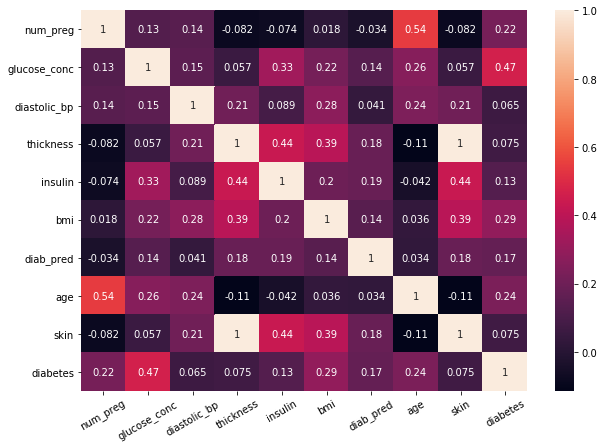

In [6]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=True)
plt.xticks(rotation=30)
plt.show()

True counts :  268
False counts :  500


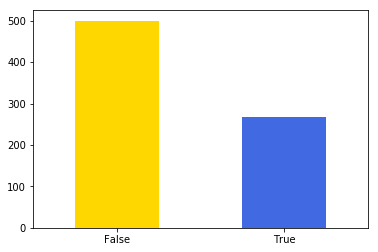

In [7]:
# Checking the dataset is Imbalanced or not , Here we see that True counts are 1/2 of False counts

diabetes_True = len(data.loc[data['diabetes'] == True])
diabetes_False = len(data.loc[data['diabetes'] == False])
print('True counts : ', diabetes_True)
print('False counts : ', diabetes_False)


data['diabetes'].value_counts().plot.bar(color=['gold','royalblue'])
plt.xticks(rotation=0)
plt.show()

## Data preprocessing

In [8]:
data['diabetes'] = data['diabetes'].map({True:1, False:0})     # Changing 'diabetes' column into 1 and 0

In [9]:
X = data.drop('diabetes', axis=1).values          # 1st split the data into independent features -> X
y = data['diabetes'].values                       # y - dependent feature

#### We have seen that many columns have 0 values, so we impute the mean values inplace of it.  

In [10]:
print("number of rows missing glucose_conc: {0}".format(len(data.loc[data['glucose_conc'] == 0])))
print("number of rows missing thickness: {0}".format(len(data.loc[data['thickness'] == 0])))

number of rows missing glucose_conc: 5
number of rows missing thickness: 227


#### Impute value

In [11]:
from sklearn.preprocessing import Imputer

fill_values = Imputer(missing_values=0, strategy="mean", axis=0)

X = fill_values.fit_transform(X)   # Here we imputing mean value in X independent features

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


#### splitting the dataset for training and testing

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)  # then train test split

## Random Forest Classifier

In [13]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=10)
model.fit(X_train, y_train.ravel())                  # y_train.ravel()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

#### ravel() :  returns contiguous flattened array (1D array with all the input-array elements and with the same type as it). Flattened array having same type as the Input array. 

In [14]:
prediction = model.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, prediction)
print(f'Accuracy is : {acc:0.2%}')

Accuracy is : 74.46%


## Randomized Search CV for - XGBoost

In [16]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

In [17]:
# Hyperparameter optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]    
}


classifier = xgb.XGBClassifier()

random_search = RandomizedSearchCV(classifier,n_iter=5, param_distributions=params, scoring='roc_auc', n_jobs=-1, cv=5,
                                   verbose=3)

In [18]:
start_time = time.time()              # Here we also calculate the time

random_search.fit(X_train, y_train.ravel())     # Here we fit the data

end_time = time.time()
print('Time taken :', start_time - end_time)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Time taken : -5.08957314491272


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    4.9s finished


In [19]:
# Check Best estimator - it gives best parameters and we use those 

random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0.2, learning_rate=0.05,
       max_delta_step=0, max_depth=3, min_child_weight=5, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [20]:
# Now we create again classifier for XGBoost and use those best parameters and train it

classifier_2 = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0.3, learning_rate=0.1,
       max_delta_step=0, max_depth=4, min_child_weight=3, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [21]:
classifier_2.fit(X_train, y_train)     # fit the data

y_pred2 = classifier_2.predict(X_test)  # and then predict

In [22]:
acc2 = accuracy_score(y_test, y_pred2)

print(f'Accuracy of XGBoost classifier is : {acc2:0.2%}')

Accuracy of XGBoost classifier is : 74.46%


###### check cross validation score

In [23]:
from sklearn.model_selection import cross_val_score     

score = cross_val_score(classifier_2, X_train, y_train.ravel(), cv=10)
score

array([0.72727273, 0.81481481, 0.77777778, 0.77777778, 0.7037037 ,
       0.72222222, 0.90566038, 0.66037736, 0.75471698, 0.79245283])

In [24]:
print(f'Mean cross validation score is : {score.mean():0.2%}')

Mean cross validation score is : 76.37%


In [25]:
score.mean()        # simply

0.7636776570738835